# 0. EDA Process

**1. 1차원데이터분석**

**1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

**2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

**3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

**1.** **공분산/ 상관계수**

**2.** **다중공선성확인**

**3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

# 항공사 지연 요인 데이터 탐색적 분석


In [ ]:
출처: https://www.kaggle.com/datasets/pitterman/airline-stats

carrier_delay: 항공사 지연 요인
atc_delay: ATC 항공 교통관제 지연 요인
weather_delay: 날시로 인한 지연 요인 

In [1]:
import pandas as pd
import numpy as np

## 1. 변수 탐색

- 범주형 변수: airline
- 수치형 변수: pct_carrier_delay  , pct_atc_delay, pct_weather_delay 변수, 퍼센트

In [47]:
df =pd.read_csv("./data/airline_stats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [48]:
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [49]:
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

총 6개 항공사의 데이터를 포함하고 있다. 

그중 Delta 가 9107건으로 가장 많고, , American, Southwest, United 항공사가 5천건 수준이다

In [50]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

## 2. 수치형 변수의 통계량 확인

In [51]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [52]:
# 항공사별 기술 통계량 확인

항공사 요인의 경우, 

- American이 평균 9.04%, Jet Blue 8.08% 순이다. 
- 표준편차가 가장 큰 항공사는 United 5.36 이다. 

In [53]:
df.groupby('airline')['pct_carrier_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,3.521889,2.483224,0.0,1.935484,3.225806,4.685599,22.290323
American,5723.0,9.042180,4.139067,0.0,6.338538,8.428571,10.988763,50.000000
Delta,9095.0,6.333460,4.695292,0.0,3.813989,5.548387,7.821952,100.000000
Jet Blue,3773.0,8.081843,3.797737,0.0,5.341176,7.657895,10.280000,28.000000
Southwest,5584.0,7.521997,3.345085,0.0,5.070294,6.960930,9.354839,24.800000
United,5414.0,7.398833,5.369283,0.0,4.034708,6.445210,9.633110,100.000000


항공 교통 관제 요인의 경우,

- 평균이 Jet Blue 7.34% 제일 높고, Southwest 가 3.14% 로 제일 낮다
- 표준편차는 Alaska 와 Jet Blue 가 각각 5.69와 5.22로 비슷하게 가장 높다.

In [54]:
df.groupby('airline')['pct_atc_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,5.472672,5.699303,0.0,1.878614,3.776860,7.001330,54.838710
American,5723.0,5.993529,4.647170,0.0,3.108403,4.986523,7.594450,60.000000
Delta,9095.0,4.462978,4.364335,0.0,1.818182,3.508108,5.839901,100.000000
Jet Blue,3773.0,7.345231,5.227372,0.0,3.784314,6.136905,9.612903,40.986111
Southwest,5584.0,3.147019,2.513162,0.0,1.612527,2.559242,3.790421,21.542722
United,5414.0,5.348133,4.992464,0.0,2.431308,4.353647,7.030109,100.000000


In [55]:
df.groupby('airline')['pct_weather_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,0.513497,1.136494,0.0,0.000000,0.000000,0.497395,14.633803
American,5723.0,1.122920,1.097811,0.0,0.296719,0.884354,1.641725,12.500000
Delta,9095.0,0.680765,1.093255,0.0,0.000000,0.316406,0.893346,20.500000
Jet Blue,3773.0,0.465327,0.764147,0.0,0.000000,0.157312,0.666667,9.923077
Southwest,5584.0,0.512611,0.649631,0.0,0.105675,0.305598,0.663306,6.240987
United,5414.0,0.680697,1.338433,0.0,0.000000,0.263780,0.861395,33.333333


## 3. 결측치 확인 

각 변수별로 28건의 결측치가 확인 되었음. 

In [56]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

## 4. 시각적 분석

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


지연 요인별 발생 도수 차이가 있음 <br>
항공사 지연 요인은 첫번째 구간이 12천, 두번째 구간이 15천이다. <br>
ATC 지연 요인은 첫번째 구간이 2만으로 가장 높다. <br>
날씨 지연 요인은 첫번째 구간은 3만으로 다른 요인들에 비해 높다. 

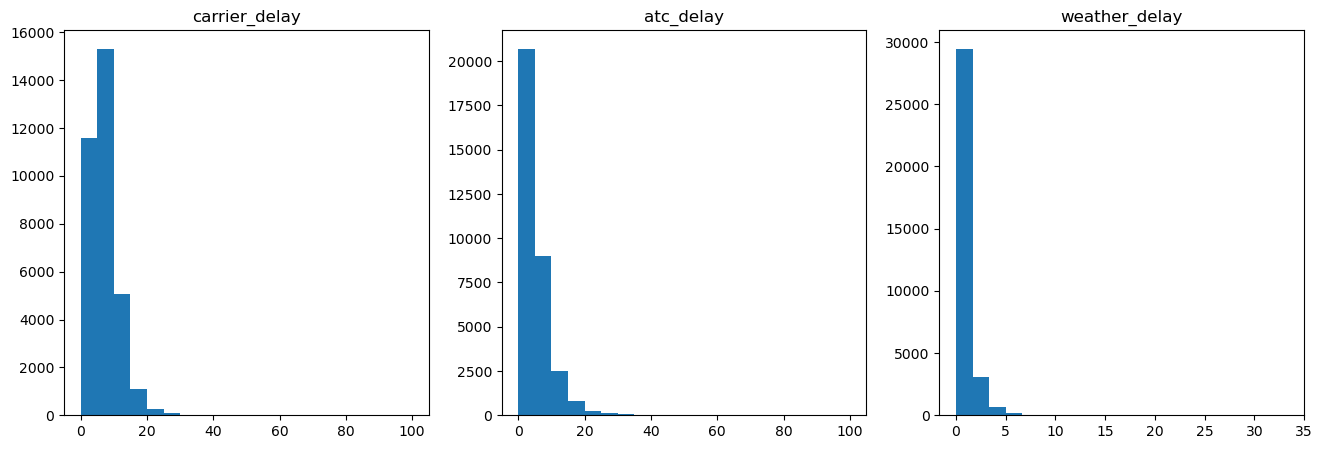

In [59]:
fig = plt.figure(figsize=(16,5))
fig.tight_layout()

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['pct_carrier_delay'],bins=20)
ax2.hist(df['pct_atc_delay'],bins=20)
ax3.hist(df['pct_weather_delay'],bins=20)

ax1.set_title('carrier_delay')
ax2.set_title('atc_delay')
ax3.set_title('weather_delay')

plt.show()

박스 플롯

지연 유형별 중앙값, 사분위수, 이상치를 확인

1) 항공사 지연: 20% 이상인 경우를 이상치로 판단, 그런데 100에 육박하는 극단적인 지연율도 있다.
2) ATC 지연: 항공사 지연보다는 낮은 수준에서 이상치로 판단, 역시 100인 극단적인 지연도 있으나 항공사 지연요인 보다 빈번하지 않다.
3) 날씨 지연: 중앙값, IQR 자체가 적다. 이상치가 20이상인 경우이고, 다른 요인들에 비해 상대적으로 빈번하진 않다.
   

<Axes: >

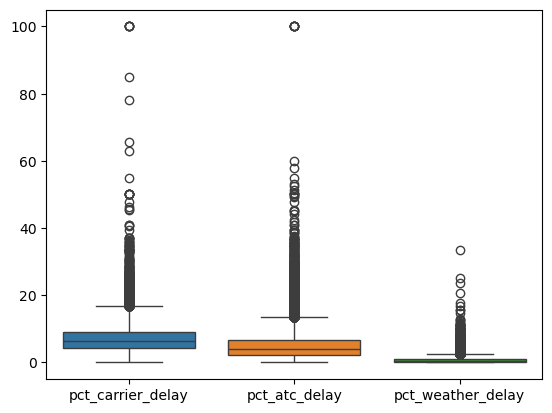

In [60]:
sns.boxplot(data=df)

In [61]:
# 항공사 별로 상자 그림

항공사 지연 요인을 항공사별로 분석하면 <br>

Delta, United 항공사가 중앙값은 다른 항공사에 비해 크지 않다. 그러나 이상치가 많이 보인다.<br>
Alaska 가 전반적으로 발생율이 낮은 편이다 <br>

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

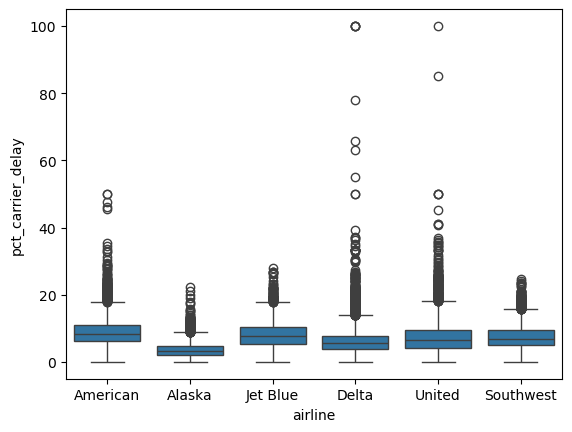

In [62]:
sns.boxplot(x = 'airline', y = 'pct_carrier_delay', data= df)

ATC 지연 요인을 항공사별로 분석하면

항공사 지연 요인과 비슷하게 Delta, United 항공사가 중앙값은 다른 항공사에 비해 크지 않다. 그러나 이상치가 많이 보인다.
Alaska 가 전반적으로 발생율이 낮은 편이다

<Axes: xlabel='airline', ylabel='pct_atc_delay'>

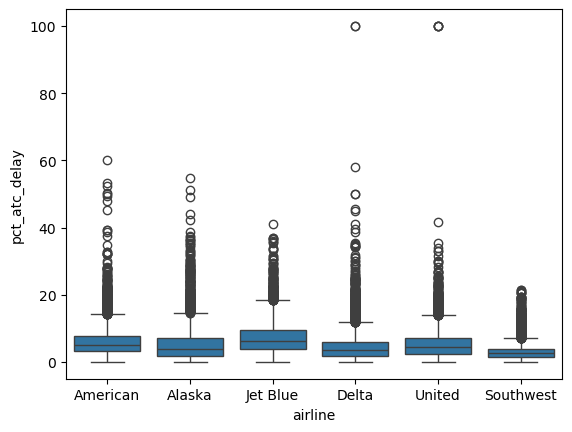

In [64]:
sns.boxplot(x = 'airline', y = 'pct_atc_delay', data= df)

<Axes: xlabel='airline', ylabel='pct_weather_delay'>

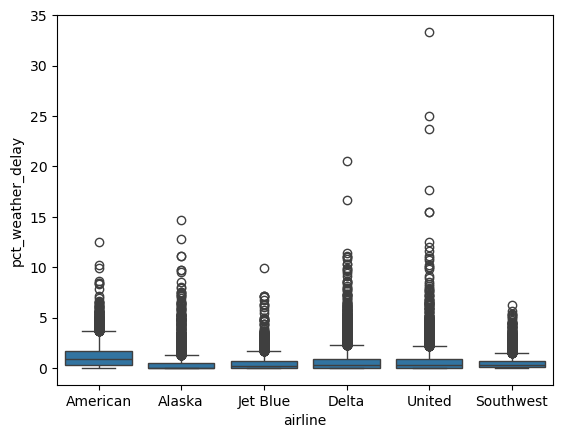

In [37]:
sns.boxplot(x = 'airline', y = 'pct_weather_delay', data= df)

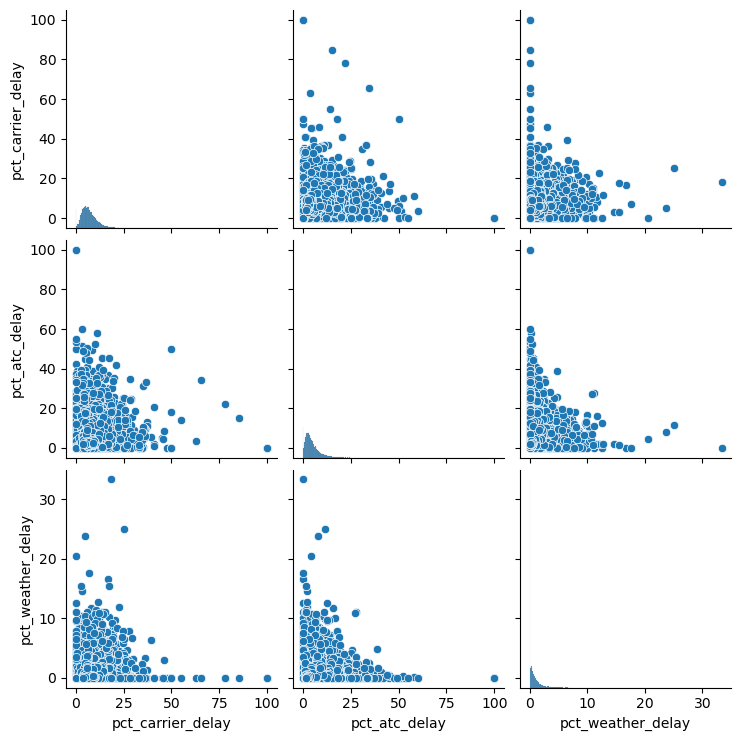

In [43]:
sns.pairplot(df)

1. 항공사 요인 vs. ATC 요인 간 상관계수가 0.14로, 약한 상관관계가 있음을 확인 할 수 있다. 
2. 항공사 요인 vs. 날씨 요인 요인간 상관계수가 0.16으로, 역시 약한 상관관계가 있음을 확인. 이것은 항ㅇ공사 지연이 발생했을 때 기상 지연도 발생할 수 있다는 것을 의미하지만 상당부분 두 지연요인은 독립적으로 발생하는 것으로 보인다.
3. ATC 요인 vs. 날씨 요인은 상관 계수가 0.092로 거의 상관이 없다고 볼 수 있습니다.  서로 독립적으로 발생하는 경향이 있음을 의미한다. 

In [45]:
#상관관계 시각화

In [70]:
cor_matrix = df.corr(numeric_only = True)
cor_matrix

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

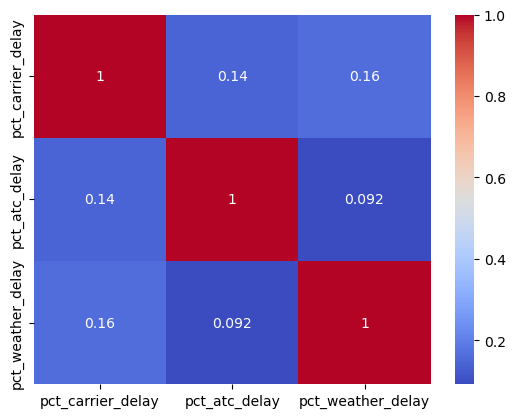

In [72]:
sns.heatmap(cor_matrix, annot = True, cmap = 'coolwarm')

## 5. 결측치 처리

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [74]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [77]:
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [94]:
df_cleaned = df.dropna()
df_cleaned

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [95]:
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (33468, 4)
Cleaned shape: (33440, 4)


In [89]:
# 결측치가 제거된 데이터로 시각적 분석, 상관관계 분석을 수행

<Axes: >

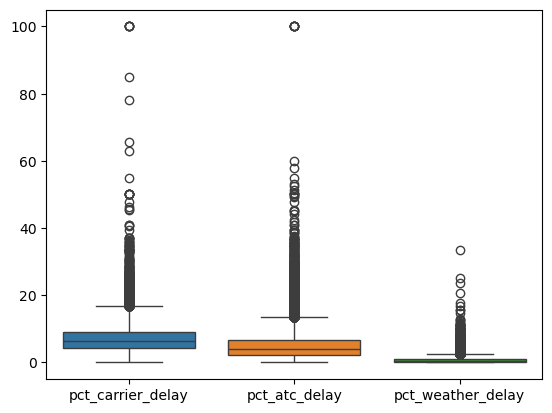

In [90]:
sns.boxplot(data=df_cleaned)

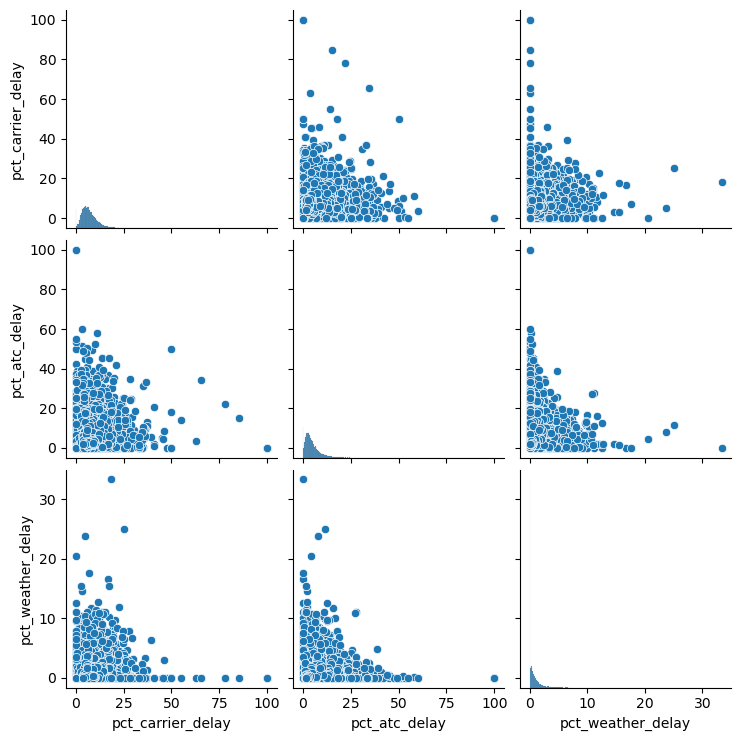

In [86]:
sns.pairplot(df_cleaned)

In [91]:
cor_matrix_cleaned = df_cleaned.corr(numeric_only = True)
cor_matrix_cleaned

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

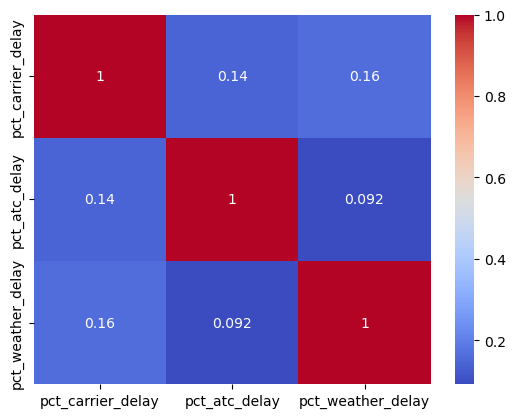

In [92]:
sns.heatmap(cor_matrix_cleaned, annot = True, cmap = 'coolwarm')